In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.read_csv('../GDSC SJ/train - train.csv')

In [3]:
print(train_data.shape)
train_data.head()

(83293, 33)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


## Focusing on train dataset to make sure data is ready for modelling process

In [4]:
train_data.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
count,83293,83293.000000,83293.000000,83293.000000,83293,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83290.000000,83293.000000,83293,82947,83293,83293,83293.000000,83293.000000,83293.000000,83293,83293,83293.000000,83293,71889.000000,4734.000000,83293.000000,83293,83293.000000,83293.000000,83293.000000,83293,83293,83293.000000
unique,64,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,165,8,5,NaN,NaN,NaN,10,11,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,914,NaN
top,Renaissance New York Times Square Hotel New Yo...,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2017-10-21,NaN
freq,1373,NaN,NaN,NaN,9643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64424,33952,39445,68368,NaN,NaN,NaN,60062,51702,NaN,72979,NaN,NaN,NaN,62535,NaN,NaN,NaN,52516,1024,NaN
mean,NaN,0.369503,103.914230,2018.156808,NaN,27.164023,15.786116,0.930390,2.503812,1.854466,0.103614,0.008032,NaN,NaN,NaN,NaN,0.030243,0.086994,0.141765,NaN,NaN,0.223068,NaN,86.867282,190.003802,2.352238,NaN,101.724373,0.061818,0.571945,NaN,NaN,41647.000000
std,NaN,0.482673,106.874124,0.706656,NaN,13.623752,8.775931,1.004196,1.924511,0.606139,0.398821,0.100641,NaN,NaN,NaN,NaN,0.171255,0.862988,1.554390,NaN,NaN,0.656237,NaN,110.875605,131.969152,17.820652,NaN,48.082552,0.245027,0.793742,NaN,NaN,24044.762323
min,NaN,0.000000,0.000000,2017.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,1.000000
25%,NaN,0.000000,18.000000,2018.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.530000,0.000000,0.000000,NaN,NaN,20824.000000
50%,NaN,0.000000,69.000000,2018.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,183.000000,0.000000,NaN,94.500000,0.000000,0.000000,NaN,NaN,41647.000000
75%,NaN,1.000000,160.000000,2019.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,62470.000000


In [5]:
train_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
train_data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


(83293, 33)


C:\Users\hardi\AppData\Local\Temp\ipykernel_10532\1399015459.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=train_data.columns ,rotation = 90)


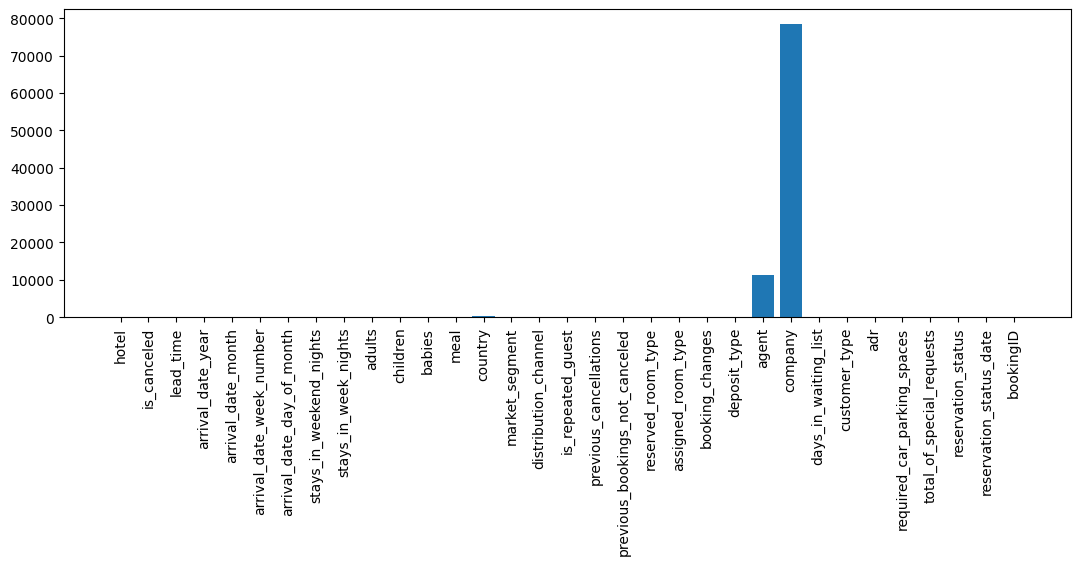

In [7]:
fig, ax = plt.subplots(figsize=(13,4))

# To know how much row is
print(train_data.shape)

# Show missing value
ax.bar(train_data.columns, train_data.isna().sum())
ax.set_xticklabels(labels=train_data.columns ,rotation = 90)
plt.show()

#### Remove missing value more than 50% from total data

In [8]:
train_data.dropna(axis=1, thresh=int(0.5*len(train_data)), inplace=True)

#### Fill the missing value of 'agent' & 'children' cols

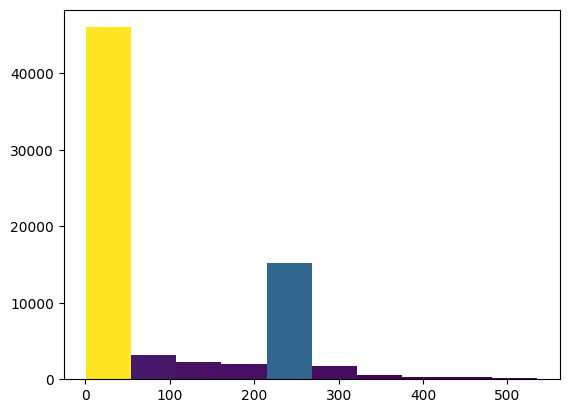

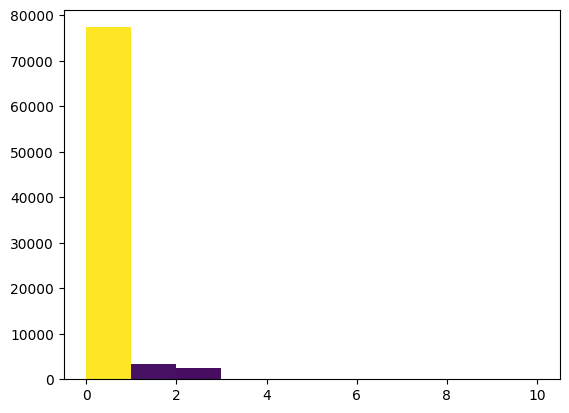

In [9]:
import matplotlib.colors as colors

def hist_cols(data_cols, bin):
    for i, column in enumerate(data_cols):
        N, bins, patches = plt.hist(column, bins = bin)
        fracs = N / N.max()
        norm = colors.Normalize(fracs.min(), fracs.max())

        for thisfrac, thispatch in zip(fracs, patches):
            color =  plt.cm.viridis(norm(thisfrac))
            thispatch.set_facecolor(color)

        plt.show()

list_data = [train_data['agent'], train_data['children']]
hist_cols(list_data, 10)

In [10]:
train_data['agent'] = train_data['agent'].fillna(train_data['agent'].median())
train_data['children'] = train_data['children'].fillna(train_data['children'].median())

#### Fill categorical missing value data

In [11]:
## Using most frequent value

mode_value = train_data['country'].mode()[0]

train_data['country'].fillna(mode_value, inplace=True)

print('Missing Value in Country cols :', train_data['country'].isna().sum())

Missing Value in Country cols : 0


#### See are data have duplicated in row or not

In [12]:
train_data[train_data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID


#### See correlation

C:\Users\hardi\AppData\Local\Temp\ipykernel_10532\470847965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), cmap='crest', annot=True, fmt='.3f')


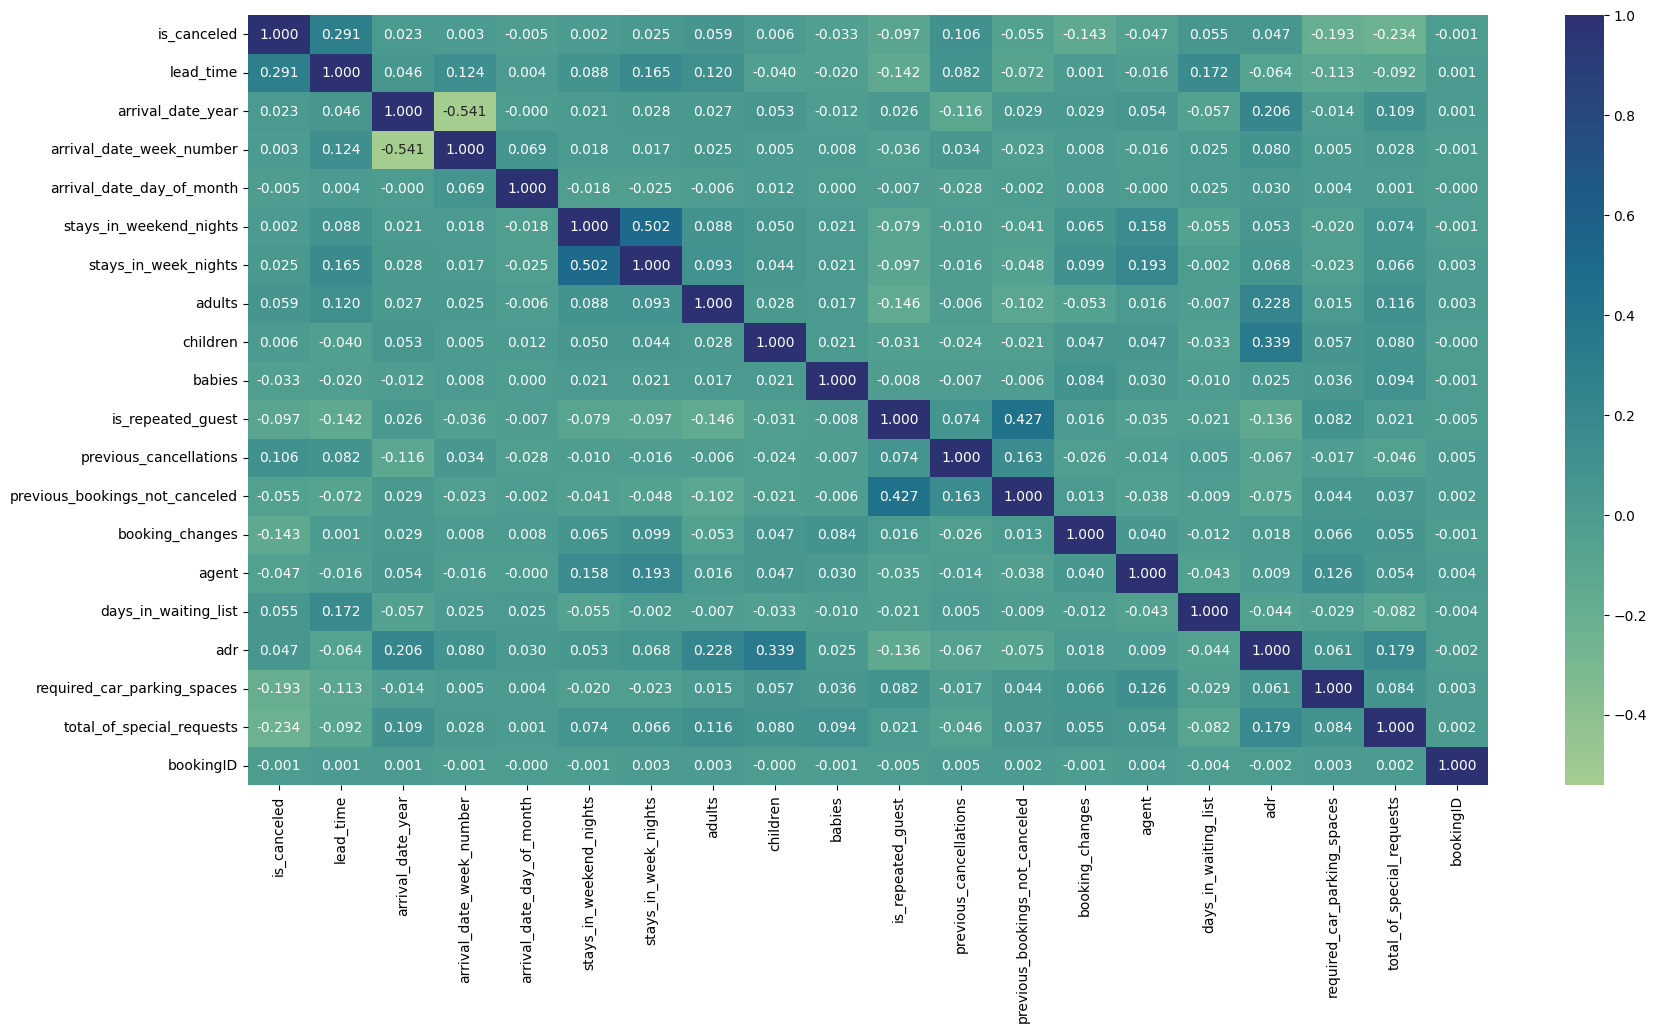

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(), cmap='crest', annot=True, fmt='.3f')
plt.show()

## No rows have high correlated

#### See the outlier from data

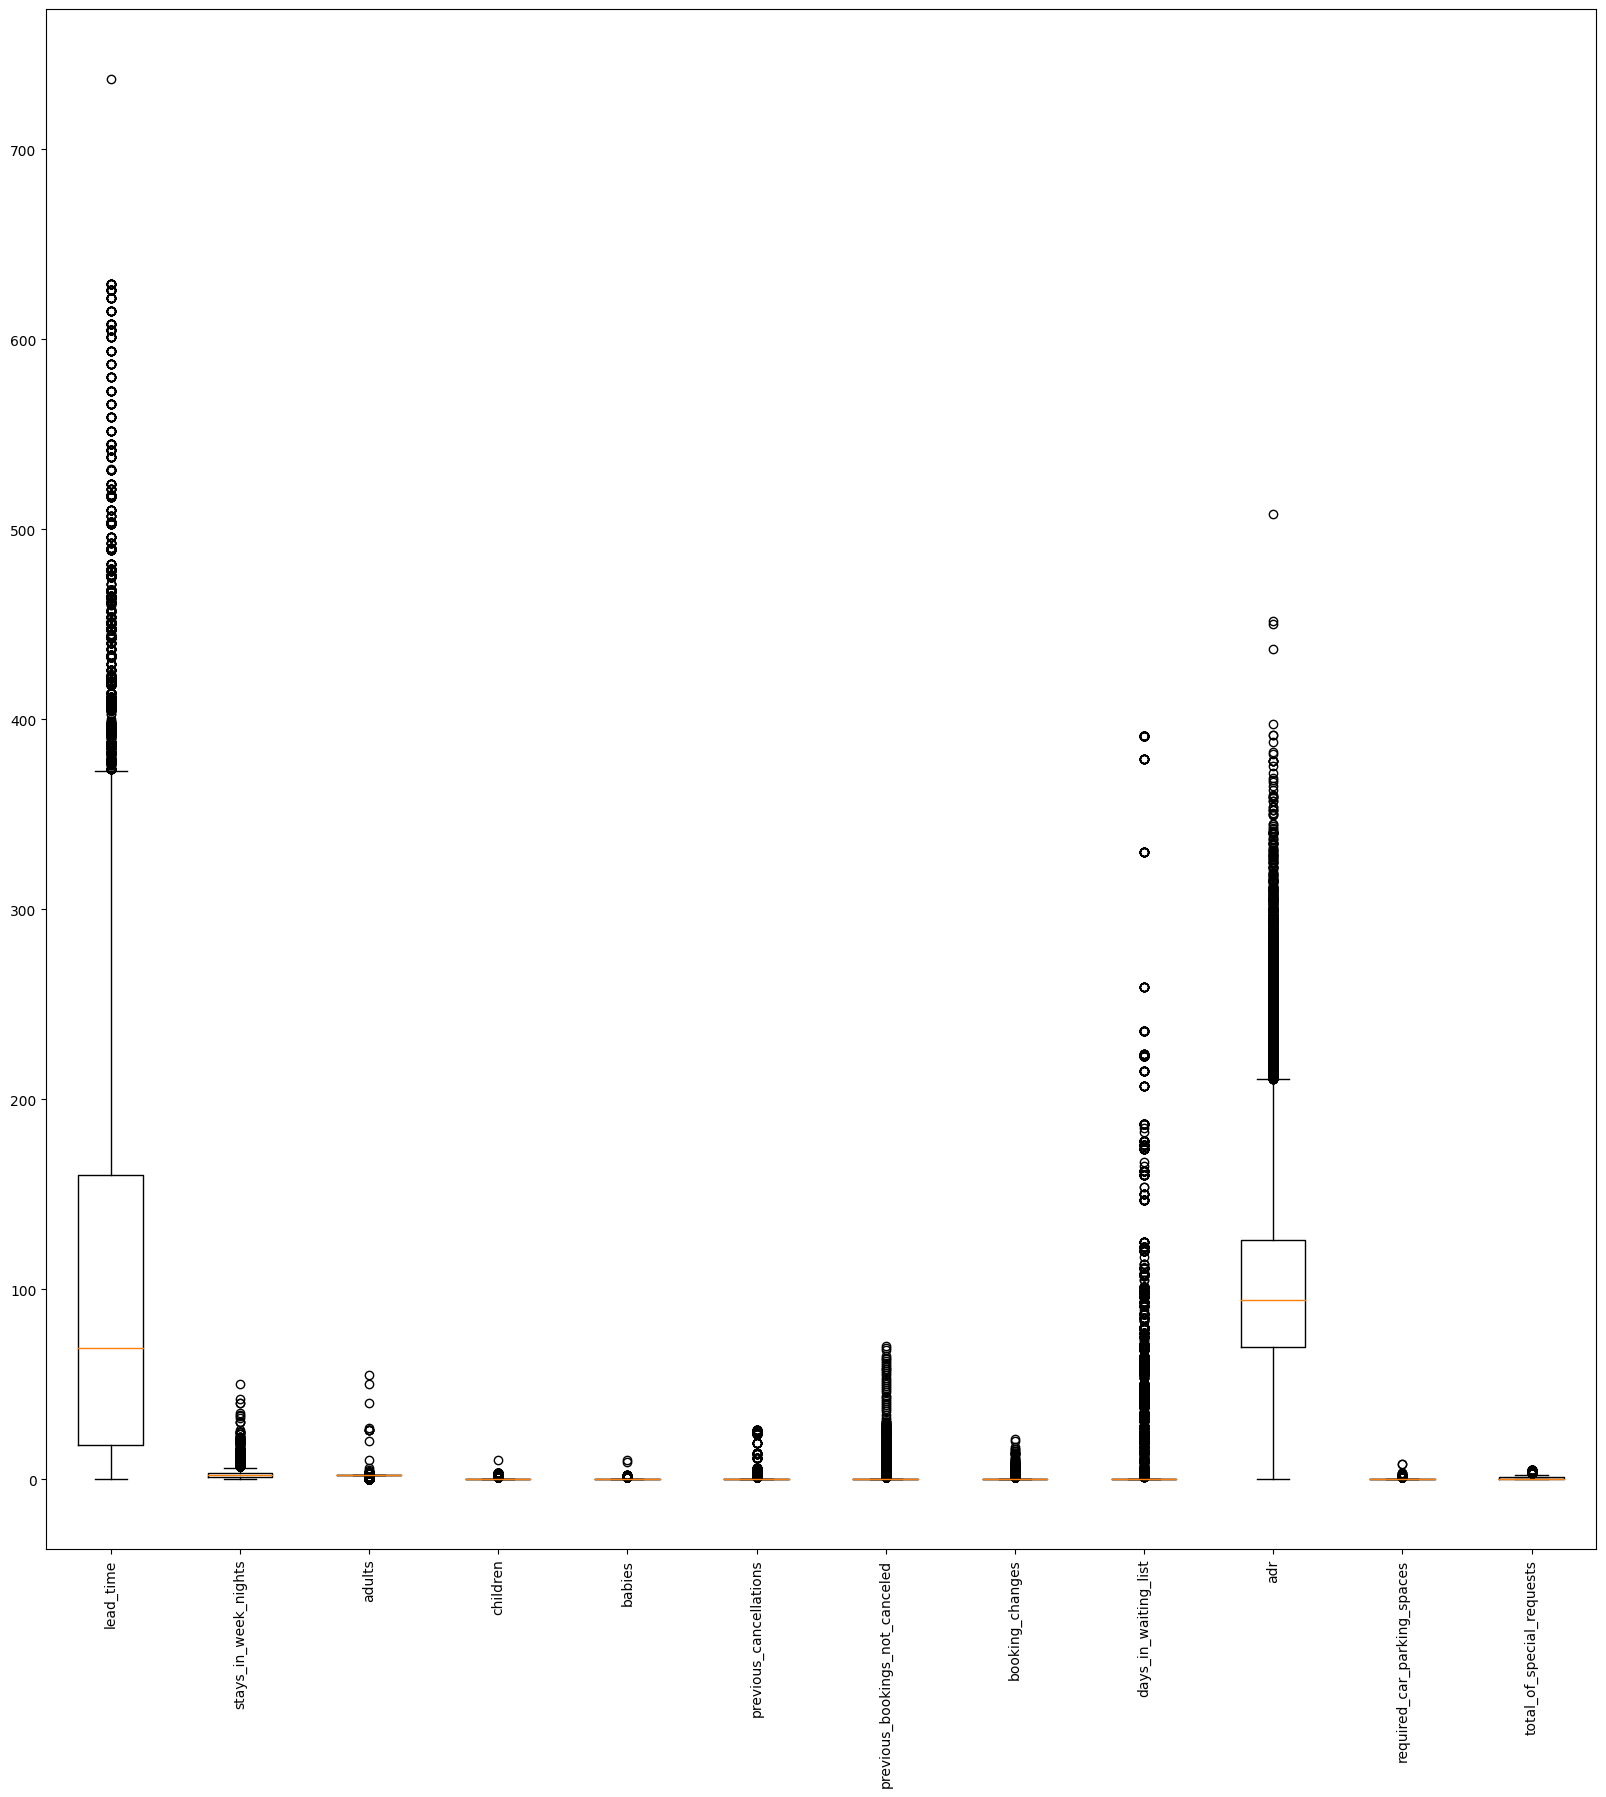

In [14]:
numerical_data = train_data[['lead_time', 'stays_in_week_nights', 'adults',
                             'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                             'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                             'total_of_special_requests']]

def show_outlier(data):
    fig, ax = plt.subplots(figsize=(20,20))
    ax.boxplot(x=data)
    ax.set_xticklabels(labels=numerical_data ,rotation = 90)
    plt.show()

show_outlier(numerical_data)

#### Remove Outlier

In [15]:
remove_outlierdata = ['lead_time', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                      'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
                      'required_car_parking_spaces', 'total_of_special_requests']

def remove_outlier(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].reset_index(drop=True)

    return df

new_train_data = remove_outlier(train_data, remove_outlierdata)

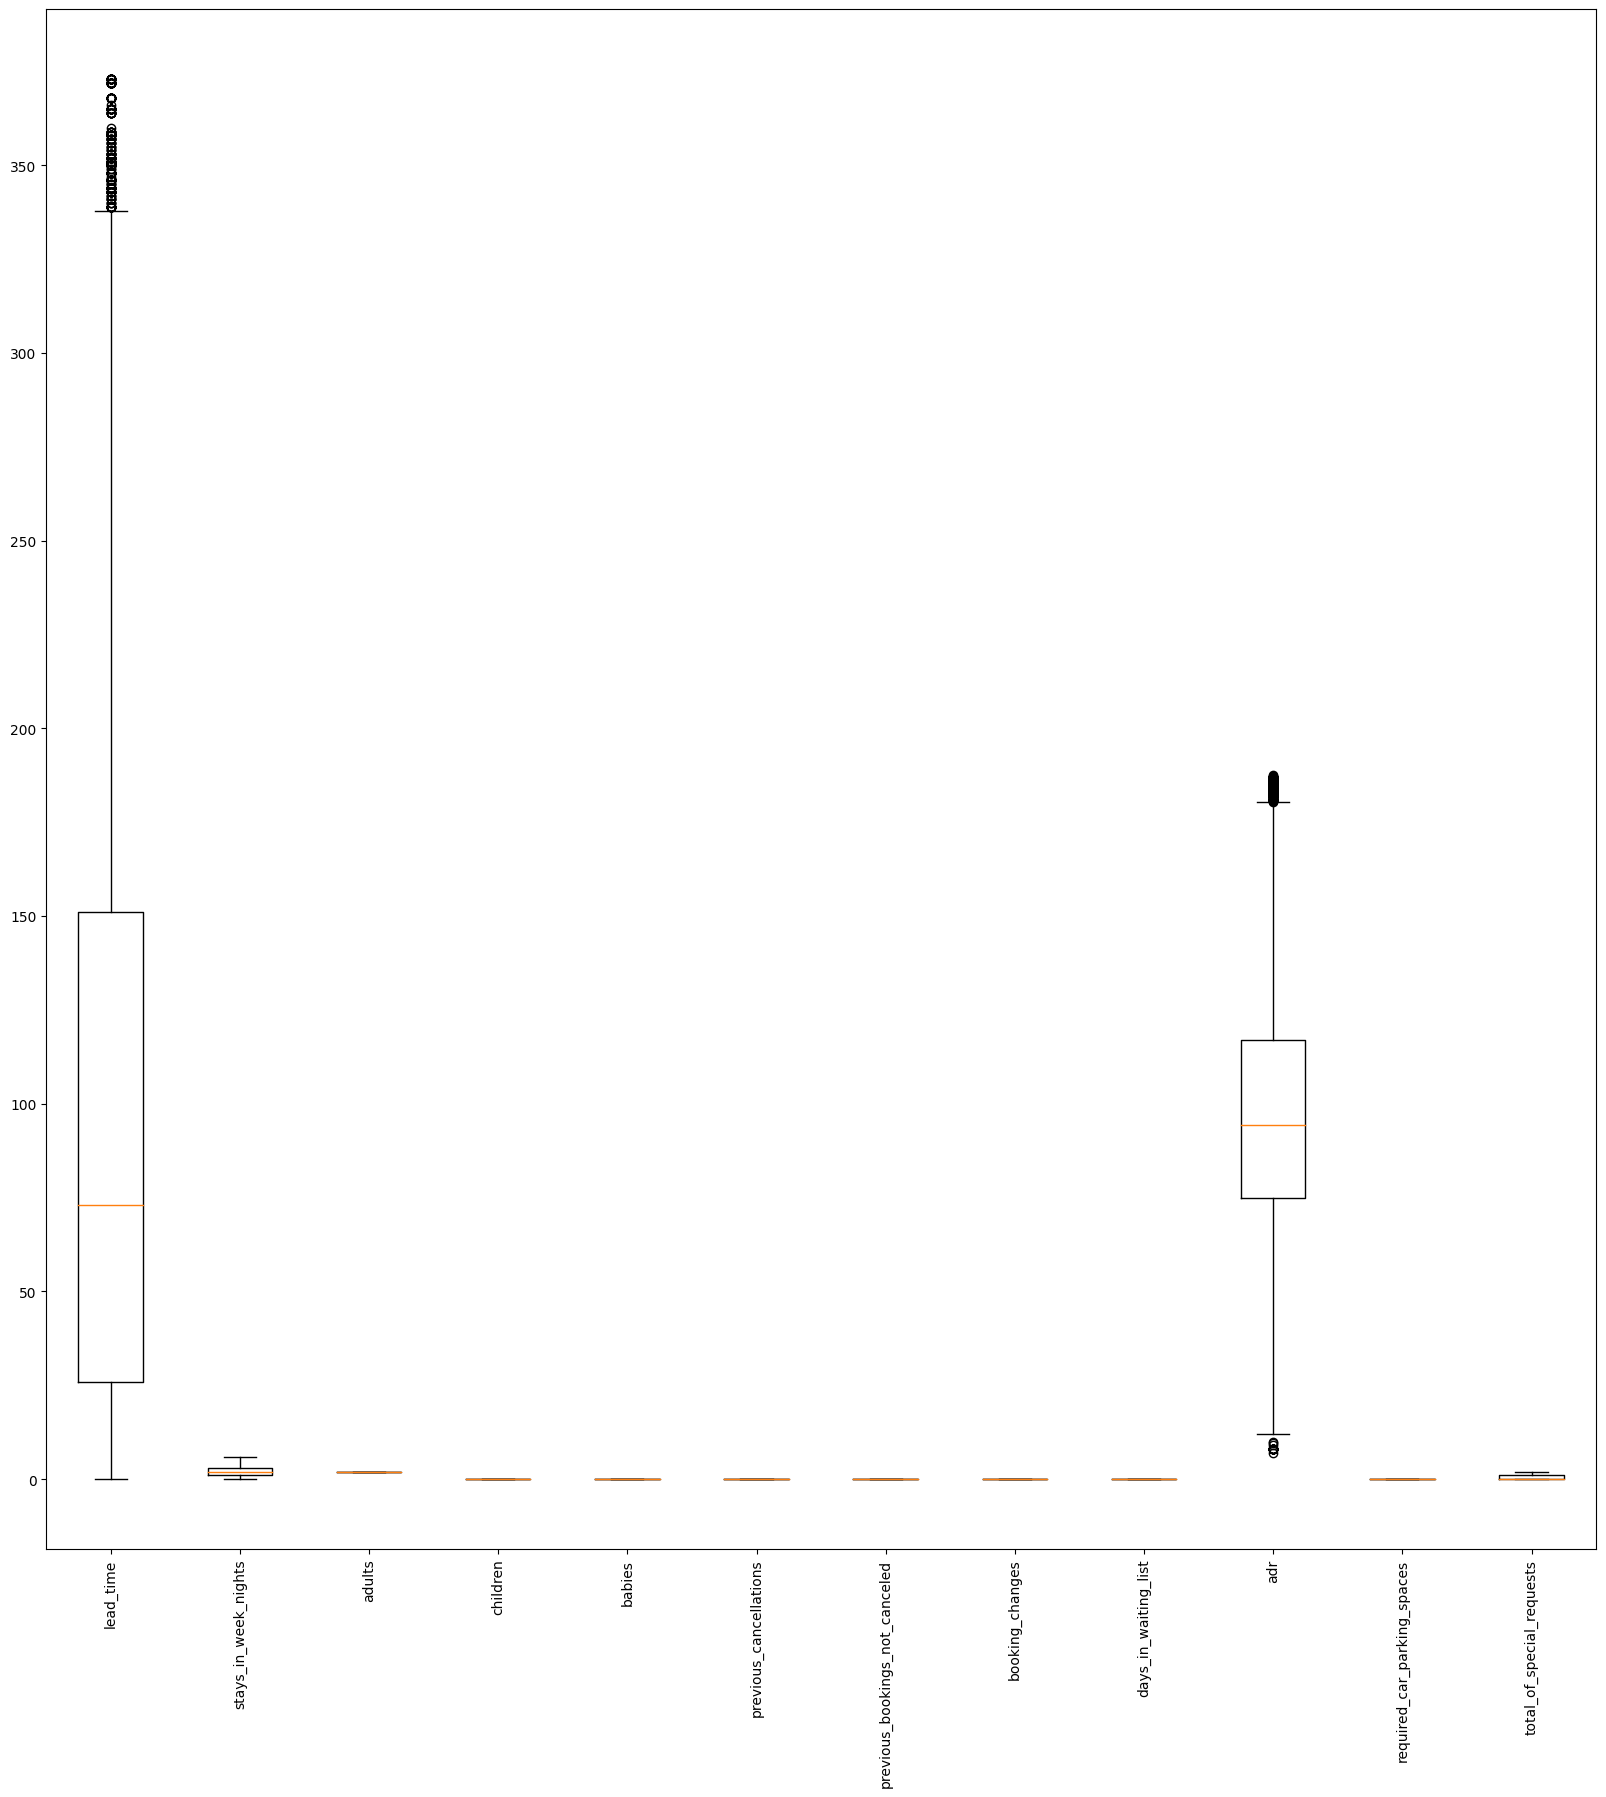

In [16]:
check_outlier_data = new_train_data[['lead_time', 'stays_in_week_nights', 'adults',
                             'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                             'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                             'total_of_special_requests']]

show_outlier(check_outlier_data)

In [17]:
print(train_data.shape)
print(new_train_data.shape)

(83293, 32)
(37610, 32)


#### Feature Scaling

In [18]:
## Using normalization
from sklearn.preprocessing import MinMaxScaler

to_norm_data = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
                'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                'bookingID']

scaler = MinMaxScaler()
new_train_data[to_norm_data] = scaler.fit_transform(new_train_data[to_norm_data])

new_train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,0.021448,2019,January,0.019231,0.300000,0,0.666667,0.0,0.0,0.0,BB,ITA,Online TA,TA/TO,0,0.0,0.0,A,A,0.0,No Deposit,0.590566,0.0,Transient,0.173961,0.0,0,Check-Out,2019-01-14,0.000000
1,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,0.469169,2019,May,0.365385,0.600000,1,0.333333,0.0,0.0,0.0,BB,PRT,Groups,TA/TO,0,0.0,0.0,A,A,0.0,Non Refund,0.020755,0.0,Transient,0.570637,0.0,0,Canceled,2018-11-25,0.000024
2,"W New York – Union Square New York, NY",1,0.088472,2017,September,0.730769,0.833333,2,0.500000,0.0,0.0,0.0,BB,PRT,Offline TA/TO,TA/TO,0,0.0,0.0,A,A,0.0,No Deposit,0.028302,0.0,Transient,0.282105,0.0,1,Canceled,2017-08-24,0.000048
3,"W New York – Times Square New York, NY",0,0.549598,2019,June,0.442308,0.400000,0,0.666667,0.0,0.0,0.0,BB,BEL,Online TA,TA/TO,0,0.0,0.0,D,D,0.0,No Deposit,0.015094,0.0,Transient,0.796399,0.0,2,Check-Out,2019-06-17,0.000072
4,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,0.117962,2017,October,0.750000,0.066667,4,1.000000,0.0,0.0,0.0,HB,GBR,Offline TA/TO,TA/TO,0,0.0,0.0,A,A,0.0,No Deposit,0.590566,0.0,Contract,0.392465,0.0,0,Check-Out,2017-10-13,0.000096


#### Extract reservation_status_date

In [19]:
new_train_data['reservation_status_date'] = pd.to_datetime(new_train_data['reservation_status_date'])
new_train_data['reservation_status_date_year'] = new_train_data['reservation_status_date'].dt.year
new_train_data['reservation_status_date_month'] = new_train_data['reservation_status_date'].dt.month
new_train_data['reservation_status_date_day'] = new_train_data['reservation_status_date'].dt.day

new_train_data.drop(columns=['reservation_status_date'], inplace=True)

#### Encoding Categorical Data

In [20]:
## Define the column that will use Label Encoding & One-Hot Encoding
label_e = ['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
one_hot_e = ['hotel', 'arrival_date_month', 'country']

In [21]:
def unique_value(df, columns):
    for col in columns:
        print(f'Name Column : {col}')
        print(f'List Category : {df[col].unique()}\n')

unique_value(new_train_data, label_e)

Name Column : meal
List Category : ['BB' 'HB' 'SC' 'FB' 'Undefined']

Name Column : market_segment
List Category : ['Online TA' 'Groups' 'Offline TA/TO' 'Direct' 'Corporate' 'Complementary'
 'Aviation']

Name Column : distribution_channel
List Category : ['TA/TO' 'Direct' 'Corporate' 'GDS' 'Undefined']

Name Column : reserved_room_type
List Category : ['A' 'D' 'E' 'F' 'B' 'C' 'G' 'H' 'L']

Name Column : assigned_room_type
List Category : ['A' 'D' 'E' 'F' 'K' 'B' 'C' 'G' 'H' 'I']

Name Column : deposit_type
List Category : ['No Deposit' 'Non Refund' 'Refundable']

Name Column : customer_type
List Category : ['Transient' 'Contract' 'Transient-Party' 'Group']

Name Column : reservation_status
List Category : ['Check-Out' 'Canceled' 'No-Show']



#### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

categories = {
    'meal' :{'Undefined' : 0, 'SC' : 1, 'BB' : 2, 'HB' : 3, 'FB' : 4},
    'market_segment': {'Complementary': 0, 'Direct' : 1, 'Offline TA/TO' : 2, 'Online TA' : 3, 'Aviation' : 4, 'Corporate' : 5, 'Groups' : 6},
    'distribution_channel': {'Undefined' : 0, 'Direct' : 1, 'TA/TO' : 2, 'GDS' : 3, 'Corporate' : 4},
    'reserved_room_type':{'A' : 8, 'B' : 7, 'C' : 6, 'D' : 5, 'E' : 4, 'F' : 3, 'G' : 2, 'H' : 1, 'L': 0},
    'assigned_room_type':{'A' : 9, 'B' : 8, 'C' : 7, 'D': 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H' : 2, 'I' : 1, 'K' : 0},
    'deposit_type':{'Non Refund' : 0, 'No Deposit' : 1, 'Refundable' : 2},
    'customer_type':{'Transient' : 0, 'Transient-Party' : 1, 'Contract' : 2, 'Group' : 3},
    'reservation_status': {'Canceled' : 0, 'No-Show' : 1, 'Check-Out' : 2}
}

label_encoder = LabelEncoder()

for col in categories:
    new_train_data[col] = new_train_data[col].map(categories[col])
    label_encoder.fit(new_train_data[col])
    new_train_data[col] = label_encoder.transform(new_train_data[col])

new_train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookingID,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,"Crystal Cove, Barbados Barbados",0,0.021448,2019,January,0.019231,0.300000,0,0.666667,0.0,0.0,0.0,2,ITA,3,2,0,0.0,0.0,8,9,0.0,1,0.590566,0.0,0,0.173961,0.0,0,2,0.000000,2019,1,14
1,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,0.469169,2019,May,0.365385,0.600000,1,0.333333,0.0,0.0,0.0,2,PRT,6,2,0,0.0,0.0,8,9,0.0,0,0.020755,0.0,0,0.570637,0.0,0,0,0.000024,2018,11,25
2,"W New York – Union Square New York, NY",1,0.088472,2017,September,0.730769,0.833333,2,0.500000,0.0,0.0,0.0,2,PRT,2,2,0,0.0,0.0,8,9,0.0,1,0.028302,0.0,0,0.282105,0.0,1,0,0.000048,2017,8,24
3,"W New York – Times Square New York, NY",0,0.549598,2019,June,0.442308,0.400000,0,0.666667,0.0,0.0,0.0,2,BEL,3,2,0,0.0,0.0,5,6,0.0,1,0.015094,0.0,0,0.796399,0.0,2,2,0.000072,2019,6,17
4,Marriott Puerto Vallarta Resort & Spa Puerto V...,0,0.117962,2017,October,0.750000,0.066667,4,1.000000,0.0,0.0,0.0,3,GBR,2,2,0,0.0,0.0,8,9,0.0,1,0.590566,0.0,2,0.392465,0.0,0,2,0.000096,2017,10,13


#### One-Hot Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(new_train_data[one_hot_e])

column_names = onehot_encoder.get_feature_names_out(input_features = one_hot_e)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=column_names)

new_train_data = pd.concat([new_train_data, onehot_encoded_df], axis=1)
new_train_data.drop(columns=one_hot_e, inplace=True)

new_train_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,bookingID,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day,"hotel_Albuquerque Airport Courtyard Albuquerque, NM","hotel_Anaheim Marriott Anaheim, CA","hotel_Baltimore BWI Airport Courtyard Linthicum, MD","hotel_Baton Rouge Acadian Centre/LSU Area Courtyard Baton Rouge, LA","hotel_Berlin Marriott Hotel Berlin, Germany","hotel_Cape Town Marriott Hotel Crystal Towers Cape Town, South Africa","hotel_Chicago O'Hare Courtyard Des Plaines, IL","hotel_Colony Club, Barbados Barbados","hotel_Courtyard Las Vegas Convention Center Las Vegas, NV","hotel_Courtyard by Marriott Aberdeen Airport Aberdeen, United Kingdom","hotel_Courtyard by Marriott Paris Gare de Lyon Paris, France","hotel_Courtyard by Marriott Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil","hotel_Courtyard by Marriott Toulouse Airport Toulouse, France","hotel_Crystal Cove, Barbados Barbados","hotel_Des Moines West/Clive Courtyard Clive, IA","hotel_Fort Worth University Drive Courtyard Fort Worth, TX","hotel_Frankfurt Marriott Hotel Frankfurt, Germany","hotel_Greensboro Courtyard Greensboro, NC","hotel_Grosvenor House, A JW Marriott Hotel London, United Kingdom","hotel_Heidelberg Marriott Hotel Heidelberg, Germany","hotel_Hotel Alfonso XIII, a Luxury Collection Hotel, Seville Seville, Spain","hotel_Hotel Maria Cristina, San Sebastian San Sebastian, Spain","hotel_Indianapolis Airport Courtyard Indianapolis, IN","hotel_Irvine John Wayne Airport/Orange County Courtyard Irvine, CA","hotel_Las Vegas Marriott Las Vegas, NV","hotel_Leipzig Marriott Hotel Leipzig, Germany","hotel_Louisville East Courtyard Louisville, KY","hotel_Marriott Puerto Vallarta Resort & Spa Puerto Vallarta, Mexico","hotel_Mt. Laurel Courtyard Mt. Laurel, NJ","hotel_Newark Liberty International Airport Courtyard Newark, NJ","hotel_Orlando Airport Courtyard Orlando, FL","hotel_Orlando International Drive/Convention Center Courtyard Orlando, FL","hotel_Protea Hotel Fire & Ice! by Marriott Cape Town Cape Town, South Africa","hotel_Protea Hotel Fire & Ice! by Marriott Johannesburg Melrose Arch Johannesburg, South Africa","hotel_Protea Hotel by Marriott Cape Town Sea Point Cape Town, South Africa","hotel_Protea Hotel by Marriott Midrand Midrand, South Africa","hotel_Protea Hotel by Marriott O.R. Tambo Airport Johannesburg, South Africa","hotel_Renaissance Hamburg Hotel Hamburg, Germany","hotel_Renaissance New York Times Square Hotel New York, NY","hotel_Renaissance Santo Domingo Jaragua Hotel & Casino Santo Domingo, Dominican Republic","hotel_Residence Inn Las Vegas Convention Center Las Vegas, NV","hotel_Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil","hotel_Sacramento Airport Natomas Courtyard Sacramento, CA","hotel_San Diego Sorrento Valley Courtyard San Diego, CA","hotel_Sheraton Diana Majestic, Milan Milan, Italy","hotel_Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil","hotel_Sheraton Lima Hotel & Convention Center Lima, Peru","hotel_Sheraton Mexico City Maria Isabel Hotel Mexico City, Mexico","hotel_Spokane Downtown at the Convention Center Courtyard Spokane, WA","hotel_St. Louis Downtown West Courtyard St. Louis, MO","hotel_Tamarind, Barbados Barbados","hotel_The House, Barbados Barbados","hotel_The Ritz-Carlton, Berlin Berlin, Germany","hotel_The Ritz-Carlton, Tokyo Tokyo, Japan","hotel_The St. Regis Osaka Osaka, Japan","hotel_The Westin Peachtree Plaza, Atlanta Atlanta, GA","hotel_Treasure Beach, Barbados Barbados","hotel_Turtle Beach, Barbados Barbados","hotel_W Barcelona Barcelon

In [24]:
new_train_data.shape

(37610, 249)

#### See if target Data have imbalanced data

In [25]:
value_targetdata = new_train_data['is_canceled'].value_counts()
print(value_targetdata)

0    22756
1    14854
Name: is_canceled, dtype: int64


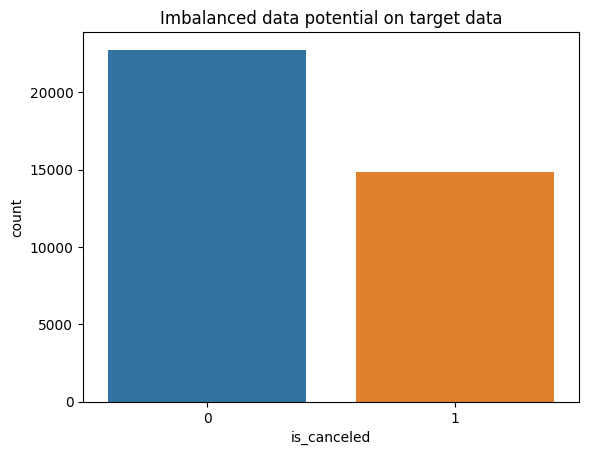

In [26]:
plt.title('Imbalanced data potential on target data')
sns.countplot(new_train_data, x = 'is_canceled')
plt.show()

## Modelling Process

#### Choose feature and target data

In [27]:
X = new_train_data.drop(columns='is_canceled')
y = new_train_data['is_canceled']

#### Split data into train and test split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using Selecting algorithm for modelling process

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression' : LogisticRegression(),
    'K-NN' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

model_names = []
accuracy_scores = []

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Evaluation metrics for {name}:")

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 50)

    model_names.append(name)
    accuracy_scores.append(accuracy)

Training Logistic Regression...


c:\Users\hardi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation metrics for Logistic Regression:
Accuracy: 0.9999
Precision: 1.0000
Recall: 0.9997
F1 Score: 0.9998
--------------------------------------------------
Training K-NN...
Evaluation metrics for K-NN:
Accuracy: 0.9896
Precision: 0.9976
Recall: 0.9759
F1 Score: 0.9866
--------------------------------------------------
Training DecisionTreeClassifier...
Evaluation metrics for DecisionTreeClassifier:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
--------------------------------------------------


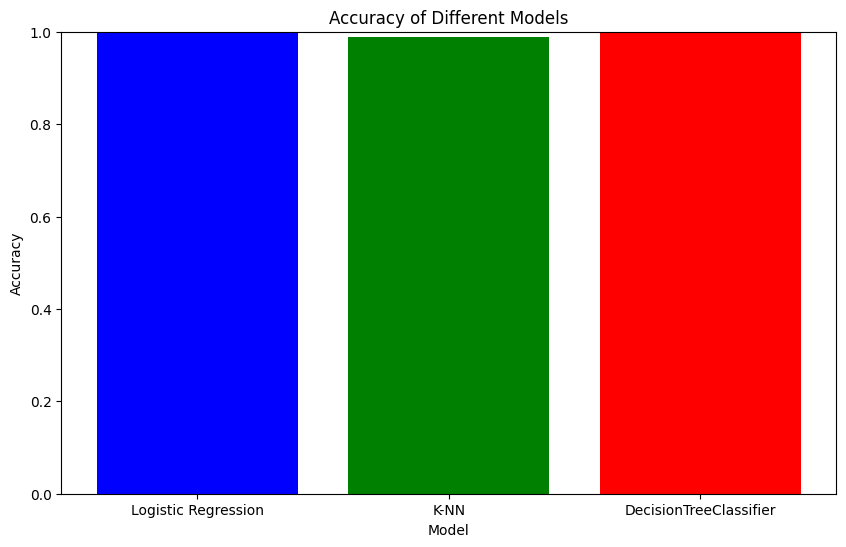

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy
plt.show()

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4578
           1       1.00      0.98      0.99      2944

    accuracy                           0.99      7522
   macro avg       0.99      0.99      0.99      7522
weighted avg       0.99      0.99      0.99      7522



Training Accuracy: 1.0
Test Accuracy: 1.0


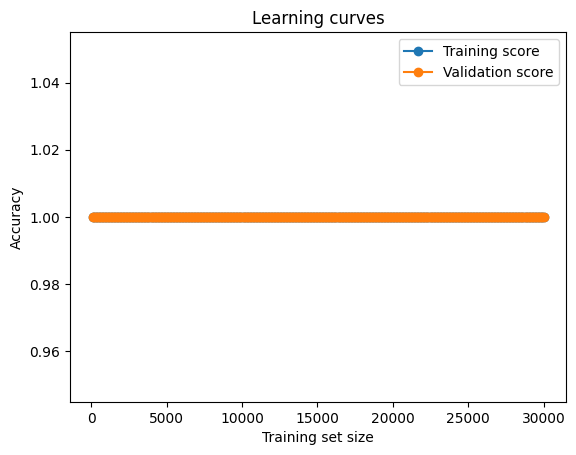

In [32]:
# train_pred = model.predict(X_train)
# train_accuracy = accuracy_score(y_train, train_pred)

# test_pred = model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_pred)

# print(f"Training Accuracy: {train_accuracy}")
# print(f"Test Accuracy: {test_accuracy}")

# # Plot learning curves
# train_sizes = range(100, len(X_train), 100)
# train_scores = []
# test_scores = []

# for size in train_sizes:
#     model.fit(X_train[:size], y_train[:size])
#     train_pred = model.predict(X_train[:size])
#     test_pred = model.predict(X_test)
#     train_scores.append(accuracy_score(y_train[:size], train_pred))
#     test_scores.append(accuracy_score(y_test, test_pred))

# plt.plot(train_sizes, train_scores, 'o-', label='Training score')
# plt.plot(train_sizes, test_scores, 'o-', label='Validation score')
# plt.xlabel('Training set size')
# plt.ylabel('Accuracy')
# plt.title('Learning curves')
# plt.legend()
# plt.show()